WQD7005 DATA MINING 

GROUP 1

QUESTION 2 - Individual Report Writing

TITLE: A Comparative Analysis on K-means and Agglomerative Hierarchical Clustering

Clustering

1. Import libraries

In [202]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

# Change working directory to script location
os.chdir(sys.path[0])

2. Data selection

In [203]:
# Load raw data
df = pd.read_csv('online_shoppers_intention.csv', index_col=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

2.2 EDA

In [204]:
# Show first five row
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [205]:
# Summarise numerical variables
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [206]:
# Summarise object variables
df.describe(include=['O'])

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


In [207]:
# Summarise boolean variables
df.describe(include=['boolean'])

,Weekend,Revenue
count,12330,12330
unique,2,2
top,False,False
freq,9462,10422


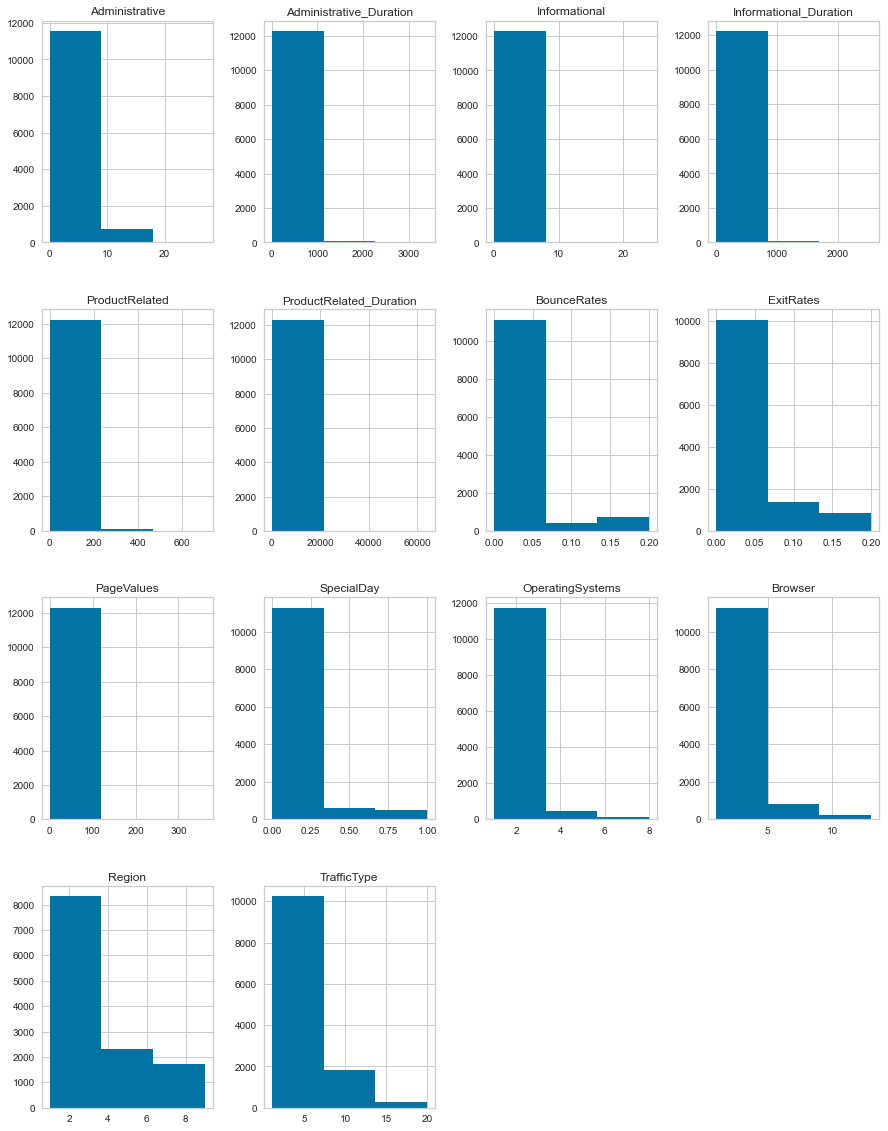

In [208]:
# Frequency histogram
# Missing values are encoded to 97,98,99
hist = df.hist(bins=3,figsize=(15,20))

<AxesSubplot:>

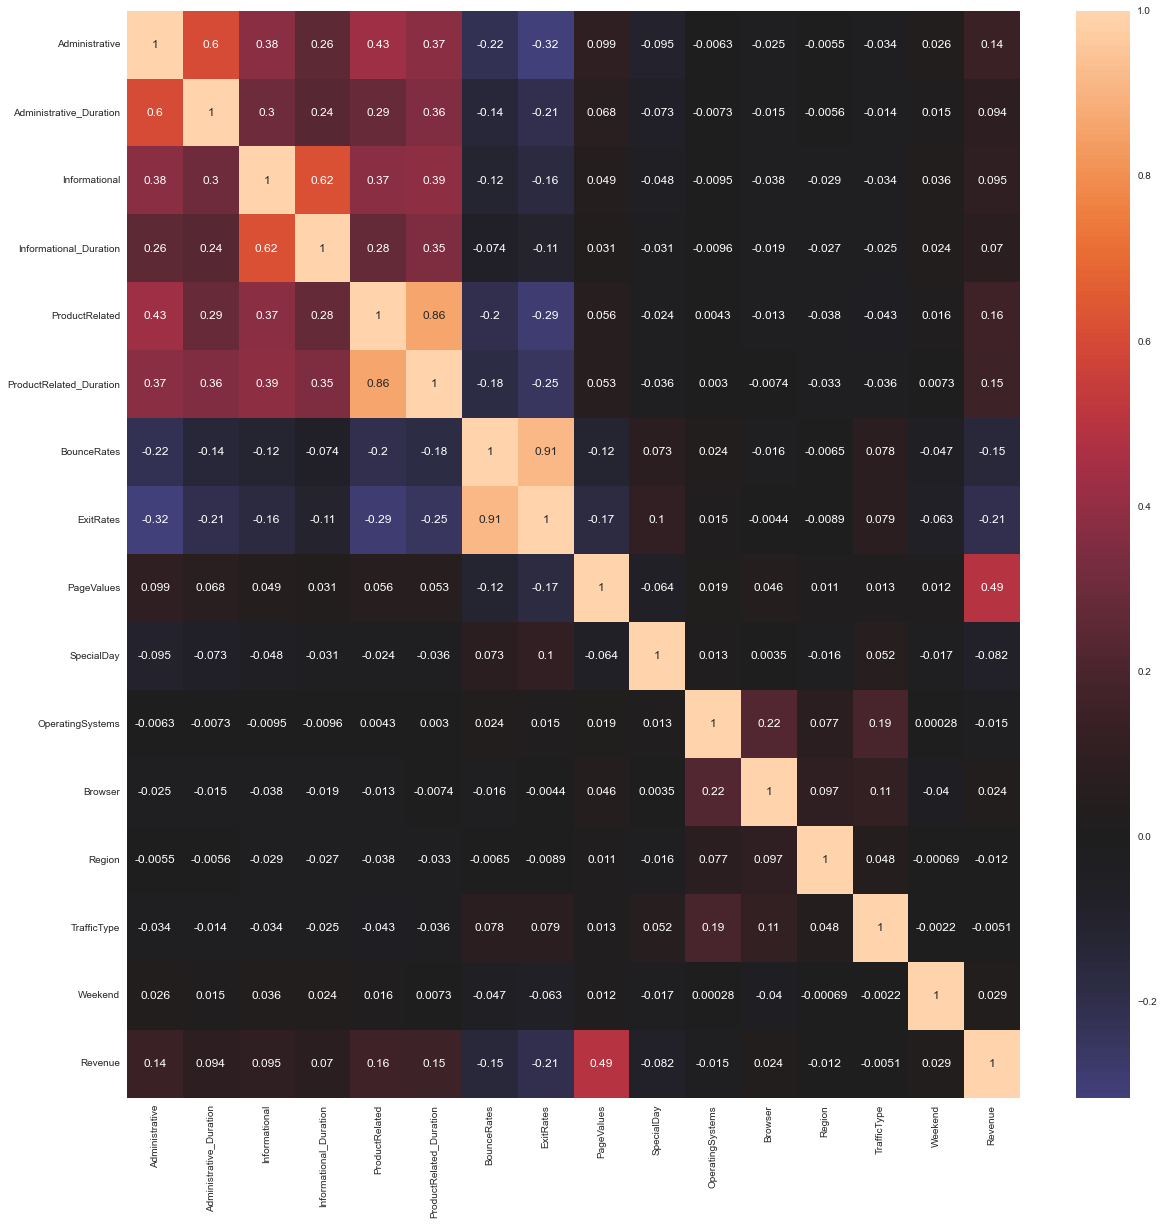

In [209]:
# Correlation matrix
corrmat= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=0)

3. Data cleaning and pre-processing

3.3 Outlier

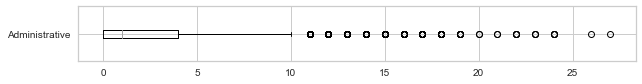

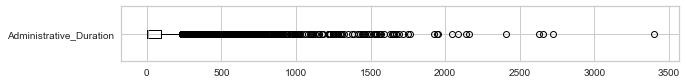

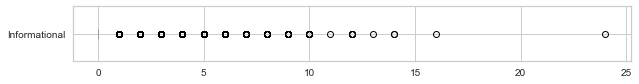

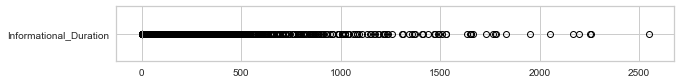

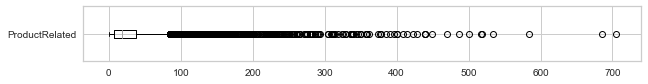

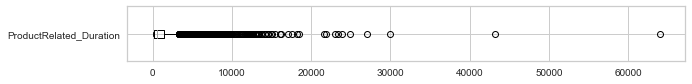

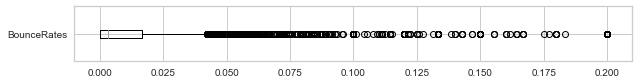

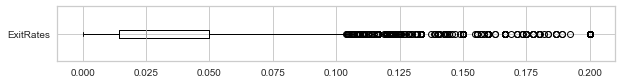

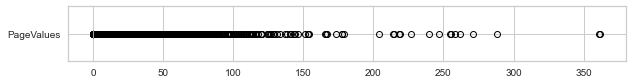

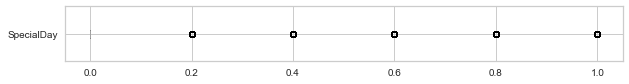

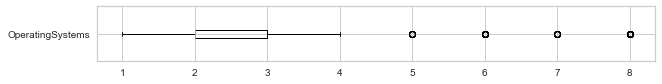

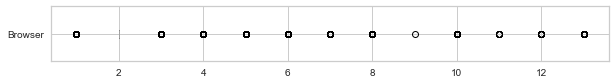

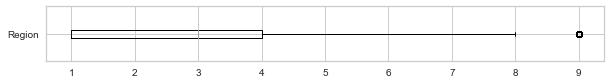

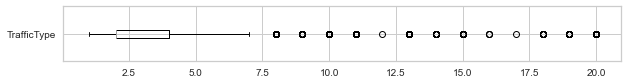

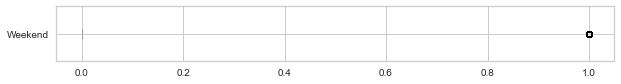

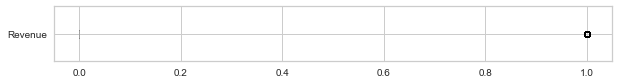

In [210]:
# All numeric variables boxplot to spot outlier (to check which has outlier)
df_outlier = df.drop(['Month',	'VisitorType'], axis = 1)
for column in df_outlier:
        plt.figure(figsize=(10,1))
        df_outlier.boxplot(column=column,vert=False)

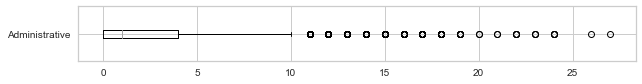

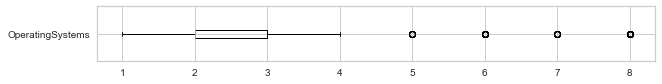

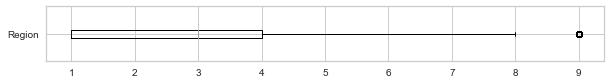

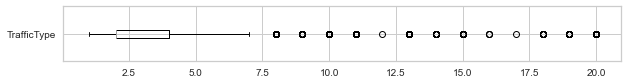

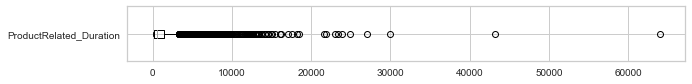

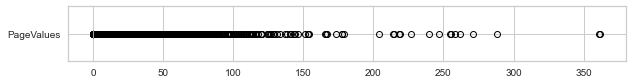

In [211]:
# Variable boxplot to spot outlier (validation purpose)
outlier_cols = ['Administrative','OperatingSystems','Region','TrafficType','ProductRelated_Duration','PageValues']
df_outlier = df[outlier_cols]
for column in df_outlier:
        plt.figure(figsize=(10,1))
        df_outlier.boxplot(column=column,vert=False)


In [212]:
# Remove outlier
outlier_cols = []
for column in df_outlier:
    Q1 = df[column].quantile(0.05)
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    df = df[(df[column] >= Q1 - 1.5*IQR) & (df[column] <= Q3 + 1.5*IQR)]

len(df)

12083

3.2 Missing values

In [213]:
# Detecting missing value - will be zero 
# because the raw dataset encoded missing value to 97,98,99.
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

3.3 Encode categorical variable to number

In [214]:
# Check Month level
df.Month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [215]:
# Check VisitorType level
df.VisitorType.unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [216]:
# Encoding the categorical variable
from sklearn.preprocessing import LabelEncoder
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)

3.4 Rescale the variable

In [217]:
#Scaling
from sklearn.preprocessing import StandardScaler

dfs = df.copy()
scaler = StandardScaler()
scaler.fit(dfs)
dfs = pd.DataFrame(scaler.transform(dfs),columns= dfs.columns)

# Show rows after encoded and scaled
dfs.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.70307,-0.471627,-0.398801,-0.245819,-0.778688,-0.757624,3.661122,3.221744,-0.366183,-0.311537,-1.344689,-1.397959,-0.833412,-0.894332,-0.770612,0.401483,-0.549844,-0.417019
1,-0.70307,-0.471627,-0.398801,-0.245819,-0.751876,-0.714073,-0.460650,1.164880,-0.366183,-0.311537,-1.344689,-0.108529,-0.197632,-0.894332,-0.513727,0.401483,-0.549844,-0.417019
2,-0.70307,-0.471627,-0.398801,-0.245819,-0.778688,-0.757624,3.661122,3.221744,-0.366183,-0.311537,-1.344689,2.470332,-0.833412,2.477343,-0.256842,0.401483,-0.549844,-0.417019
3,-0.70307,-0.471627,-0.398801,-0.245819,-0.751876,-0.755809,0.569793,1.987626,-0.366183,-0.311537,-1.344689,1.180902,-0.197632,-0.472873,0.000043,0.401483,-0.549844,-0.417019
4,-0.70307,-0.471627,-0.398801,-0.245819,-0.537373,-0.330620,-0.048473,0.136448,-0.366183,-0.311537,-1.344689,1.180902,0.438148,-0.894332,0.000043,0.401483,1.818699,-0.417019


4. Variable Selection - PCA

In [218]:
# Use PCA to reduce dimenions of input
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(dfs)
dfs_pca = pd.DataFrame(pca.transform(dfs), columns=(['col0','col1','col2','col3','col4']))

# Show extracted PC input
dfs_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
col0,12083.0,-3.763530e-17,1.860257,-4.032458,-1.004200,-0.243640,0.844653,10.482887
col1,12083.0,-7.056619e-17,1.333420,-4.820917,-0.628712,-0.132948,0.563015,8.061774
col2,12083.0,-9.408825e-18,1.169890,-2.076909,-0.790372,-0.496269,0.503856,5.577225
col3,12083.0,-1.411324e-17,1.125033,-7.724089,-0.670709,0.018045,0.663494,8.016704
col4,12083.0,4.704413e-17,1.060979,-4.163986,-0.729659,-0.121984,0.646723,5.625235


4. Clustering

4.1 KMEANS Clustering

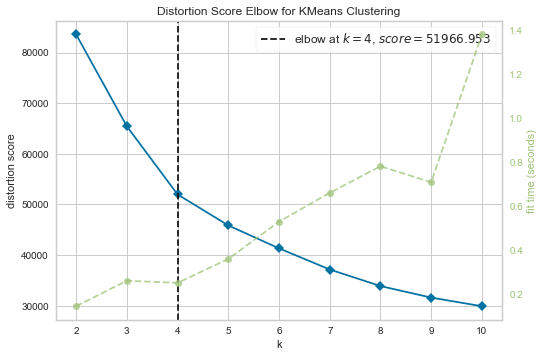

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [219]:
# Use elbow curve to find k numbers of clusters
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(dfs_pca)
Elbow_M.show()

In [220]:
# Train and predict Kmeans cluster
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(dfs_pca)

# Assign the cluster label to original data
df['Cluster_K'] = kmeans.labels_
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Cluster_K
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False,False,2
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False,False,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False,False,2
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False,False,2
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True,False,1


4.2 Agglomerative Hierarchical Clustering

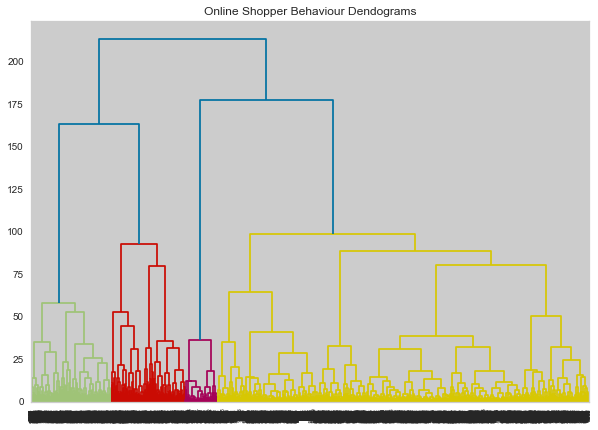

In [221]:
# Use Dendograms to find k numbers of clusters
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Online Shopper Behaviour Dendograms")
dend = shc.dendrogram(shc.linkage(dfs_pca, method='ward'))

In [222]:
# Train and predict Kmeans cluster
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters=4)
AC.fit_predict(dfs_pca)

# Assign the cluster label to original data
df['Cluster_A']= AC.labels_
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Cluster_K,Cluster_A
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False,False,2,2
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False,False,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False,False,2,2
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False,False,2,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True,False,1,0


5. Evaluate

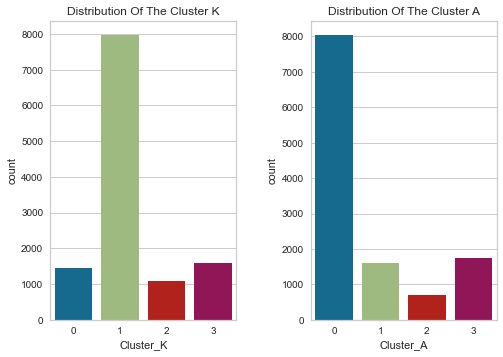

In [223]:
# Plot clusters frequency
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
sns.countplot(x=df["Cluster_K"])
ax.set_title("Distribution Of The Cluster K")

ax = fig.add_subplot(1, 2, 2)
sns.countplot(x=df["Cluster_A"])
ax.set_title("Distribution Of The Cluster A")

plt.show()

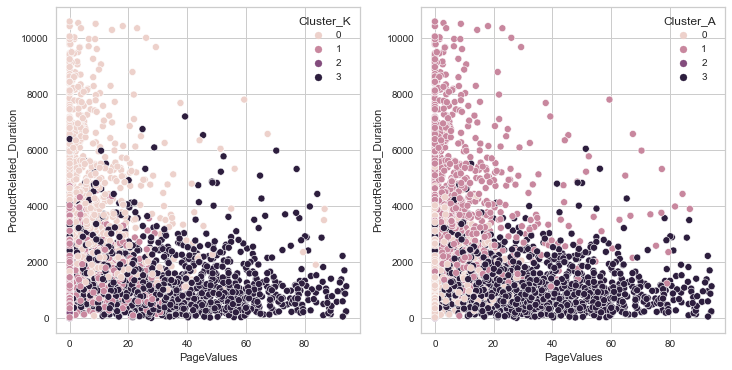

In [227]:
# PageValues vs ProductRelated_Duration
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(hspace=0.3, wspace=0.2)

ax = fig.add_subplot(1, 2, 1)
sns.scatterplot(data = df,x=df['PageValues'], y=df['ProductRelated_Duration'],hue=df['Cluster_K'])
ax = fig.add_subplot(1, 2, 2)
sns.scatterplot(data = df,x=df['PageValues'], y=df['ProductRelated_Duration'],hue=df['Cluster_A'])

plt.show()

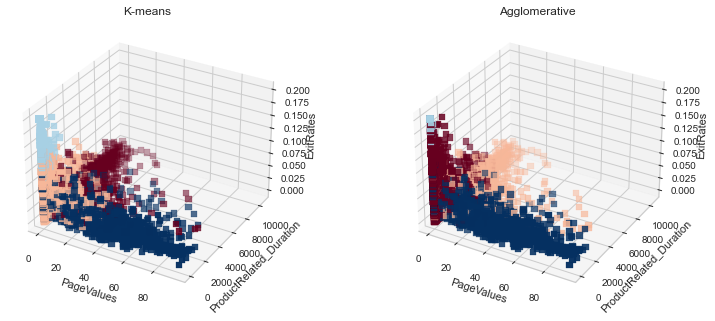

In [228]:
# 3D
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

x = np.array(df['PageValues'])
y = np.array(df['ProductRelated_Duration'])
z = np.array(df['ExitRates'])

ax = fig.add_subplot(121, projection='3d')
sc1 = ax.scatter(x,y,z, marker="s", c=df["Cluster_K"], s=40, cmap="RdBu")
ax.set_title('K-means')
ax.set_xlabel('PageValues')
ax.set_ylabel('ProductRelated_Duration')
ax.set_zlabel('ExitRates')

ax = fig.add_subplot(122, projection='3d')
sc = ax.scatter(x,y,z, marker="s", c=df["Cluster_A"], s=40, cmap="RdBu")
ax.set_title('Agglomerative')
ax.set_xlabel('PageValues')
ax.set_ylabel('ProductRelated_Duration')
ax.set_zlabel('ExitRates')

plt.show()